### Title: Exercice 7.2
### Author: Jerock Kalala
### Date: November 04 2022
### Professor: David Kinney
### Visualizing Data with Pandas and Matplotlib

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("E:\\Bellevue\\Fall_2022\\DSC 350 Data Wrangling for Data Scienc\\Week_7\\data\\fb_stock_prices_2018.csv",
                 index_col='date',
                 parse_dates=True)
df_q = pd.read_csv("E:\\Bellevue\\Fall_2022\\DSC 350 Data Wrangling for Data Scienc\\Week_7\\data\\earthquakes.csv",
                 index_col='time')

##### 1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

In [69]:
#select the important column
df_close = pd.DataFrame(df.close)

In [70]:
#calculate the rolling 20 dys minimum
df_close['min_20']=df_close.close.rolling(20).min()


Text(0.5, 1.0, 'The rolling 20-day minimum of the Facebook closing price')

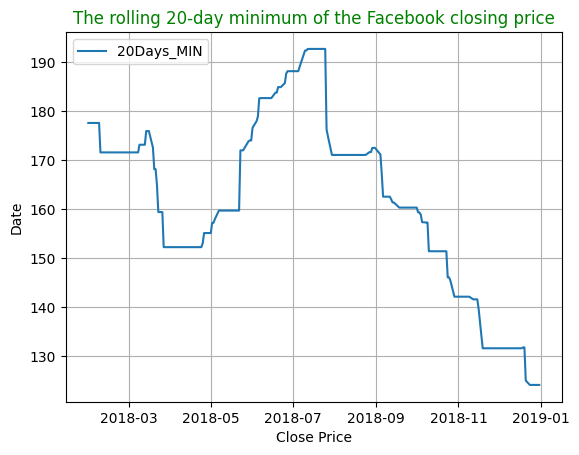

In [71]:
#Let's plot it
plt.grid(TabError)
plt.plot(df_close['min_20'], label='20Days_MIN')
plt.legend(loc=2)
plt.xlabel('Close Price')
plt.ylabel('Date')
plt.title('The rolling 20-day minimum of the Facebook closing price', color='green')

##### 2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

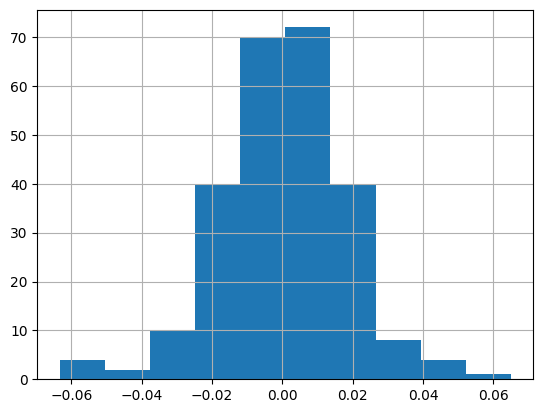

In [128]:
df['change'] = df[['open','close']].pct_change(axis=1)['close'] #using the pct_change function
df['change2'] = (df['close']) - (df['open'])
plt.hist(df['change'])
plt.grid()

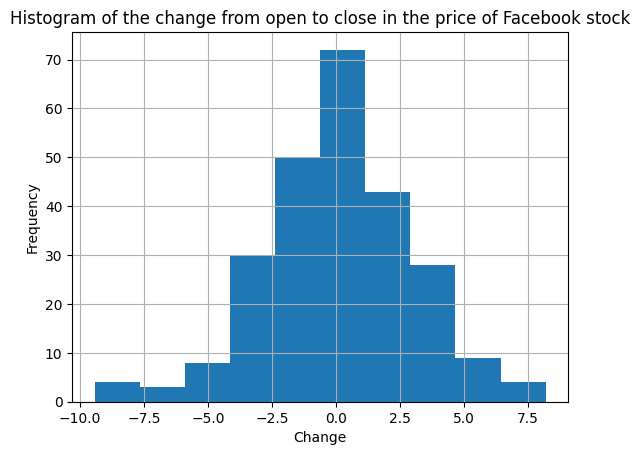

In [129]:
#plt.hist(df['change2'])
#plt.title("Change from from open to close of the price ")

df.change2.plot(kind='hist', title='Histogram of the change from open to close in the price of Facebook stock')
plt.xlabel('Change')
plt.grid("True")

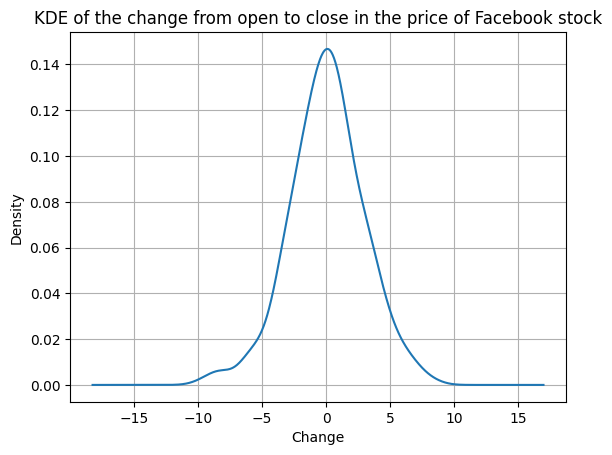

In [131]:
df.change2.plot(kind='kde', title='KDE of the change from open to close in the price of Facebook stock')
plt.xlabel('Change')
plt.grid("True")

##### 3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

Text(0, 0.5, 'earthquakes')

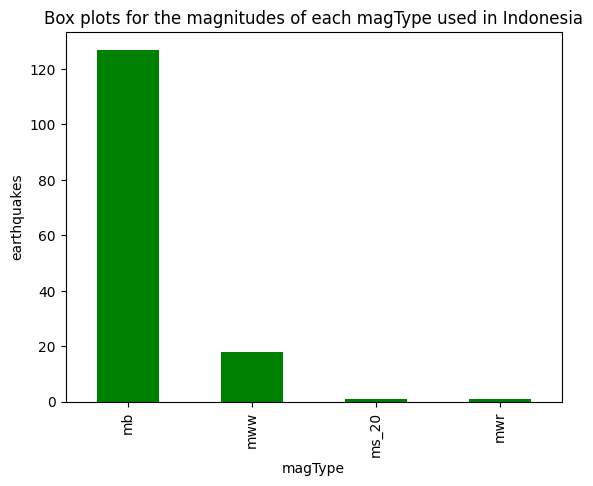

In [103]:
df_q.query('parsed_place == "Indonesia"').magType.value_counts().plot(kind="bar",
            title="Box plots for the magnitudes of each magType used in Indonesia", color='green')
plt.xlabel('magType'); plt.ylabel('earthquakes')

##### 4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

<AxesSubplot: title={'center': 'Diff b/w Weekly Max High Price\nand Weekly Min Low Price of Facebook Stock'}, xlabel='date'>

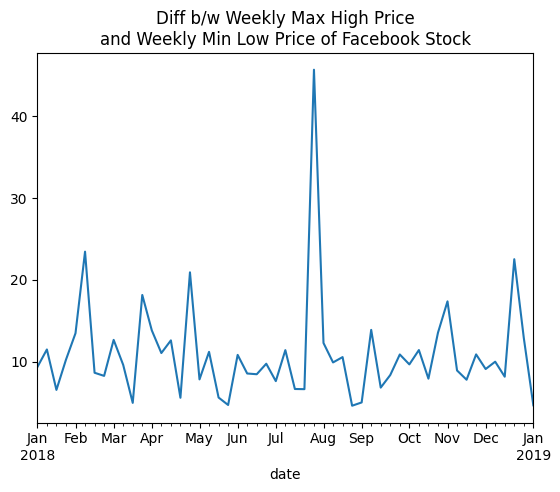

In [135]:
# %%
df.resample('1W').agg(dict(high='max',
            low='min')).assign(max_change_weekly=lambda x: x.high - x.low).max_change_weekly.plot(title='Diff b/w Weekly Max High Price\n''and Weekly Min Low Price of Facebook Stock')

##### 5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

1. The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Chapter
4, Aggregating Pandas DataFrames for an easy way to do this).
2. The second subplot will be a bar plot showing the net effect this had monthly, using resample().
3. Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).
4. Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

NameError: name 'np' is not defined

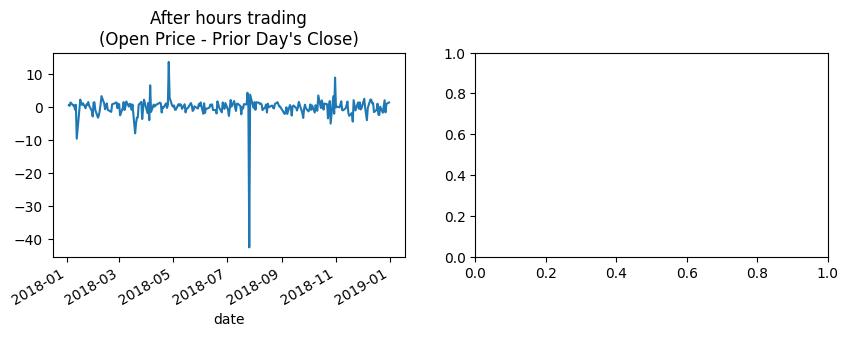

In [136]:
series = (df.open - df.close.shift())
monthly_effect = series.resample('1M').sum()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
series.plot(ax=axes[0],
    title='After hours trading\n(Open Price - Prior Day\'s Close)')

monthly_effect.index = monthly_effect.index.strftime('%b')
monthly_effect.plot(ax=axes[1], kind='bar', title='After hours trading monthly effect',
                    color=np.where(monthly_effect >= 0, 'g', 'r'), rot=0)